<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/IND163C-Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [84]:
dt=pd.read_csv('/content/IND163C - Lab1 - House Prices.csv')

In [105]:
dt.head()

,id,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,Area_of_the_basement,Built_Year,Number_of_schools_nearby,Price
0,6762810145,5,2.0,3650.0,9050.0,2.0,280,1921.0,2,2380000
1,6762810635,4,2.0,2920.0,4000.0,1.5,1010,1909.0,2,1400000
2,6762810998,5,3.0,2910.0,9480.0,1.5,0,1939.0,1,1200000
3,6762812605,4,2.0,3310.0,42998.0,2.0,0,2001.0,3,838000
4,6762812919,3,2.0,2710.0,4500.0,1.5,830,1929.0,1,805000


In [104]:
dt.tail()

,id,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,Area_of_the_basement,Built_Year,Number_of_schools_nearby,Price
14615,6762830250,2,2.0,1556.0,20000.0,1.0,0,1957.0,3,221700
14616,6762830339,3,2.0,1680.0,7000.0,1.5,0,1968.0,3,219200
14617,6762830618,2,1.0,1070.0,6120.0,1.0,0,1962.0,2,209000
14618,6762830709,4,1.0,1030.0,6621.0,1.0,0,1955.0,3,205000
14619,6762831463,3,1.0,900.0,4770.0,1.0,0,1969.0,2,-1


In [91]:
dt.isnull().sum()

id                          0
number_of_bedrooms          0
number_of_bathrooms         0
living_area                 0
lot_area                    0
number_of_floors            0
Area_of_the_basement        0
Built_Year                  0
Number_of_schools_nearby    0
Price                       0
dtype: int64

In [12]:
dt.dtypes

id                            int64
number_of_bedrooms            int64
number_of_bathrooms         float64
living_area                 float64
lot_area                    float64
number_of_floors            float64
Area_of_the_basement          int64
Built_Year                  float64
Number_of_schools_nearby      int64
Price                         int64
dtype: object

In [103]:
dt.describe()

,id,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,Area_of_the_basement,Built_Year,Number_of_schools_nearby,Price
count,1.458100e+04,14581.000000,14581.000000,14581.000000,1.458100e+04,14581.000000,14581.000000,14581.000000,14581.000000,1.458100e+04
mean,6.762821e+09,3.378643,2.072286,2097.322048,1.508897e+04,1.502332,296.513065,1970.920102,2.012825,5.386820e+05
std,6.237219e+03,0.938599,0.756672,926.099475,3.793879e+04,0.540438,448.613967,29.494600,0.817277,3.680242e+05
min,6.762810e+09,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,1900.000000,1.000000,-1.000000e+00
25%,6.762815e+09,3.000000,2.000000,1440.000000,5.010000e+03,1.000000,0.000000,1951.000000,1.000000,3.200000e+05
50%,6.762821e+09,3.000000,2.000000,1940.000000,7.617000e+03,1.500000,0.000000,1975.000000,2.000000,4.500000e+05
75%,6.762826e+09,4.000000,2.000000,2570.000000,1.079000e+04,2.000000,580.000000,1997.000000,3.000000,6.450000e+05
max,6.762832e+09,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,4820.000000,2015.000000,3.000000,7.700000e+06


In [86]:
dt['living_area']=dt['living_area'].fillna(-10)
#living_area_prom=dt['living_area'].mean(skipna = True)
print(living_area_prom)

2092.5495212038304


In [88]:
dt['living_area']=dt['living_area'].replace(-10,living_area_prom)

In [90]:
dt=dt.dropna()

In [92]:
print(dt.columns)

Index(['id', 'number_of_bedrooms', 'number_of_bathrooms', 'living_area',
       'lot_area', 'number_of_floors', 'Area_of_the_basement', 'Built_Year',
       'Number_of_schools_nearby', 'Price'],
      dtype='object')


In [106]:
dt['number_of_bathrooms']=dt['number_of_bathrooms'].round()

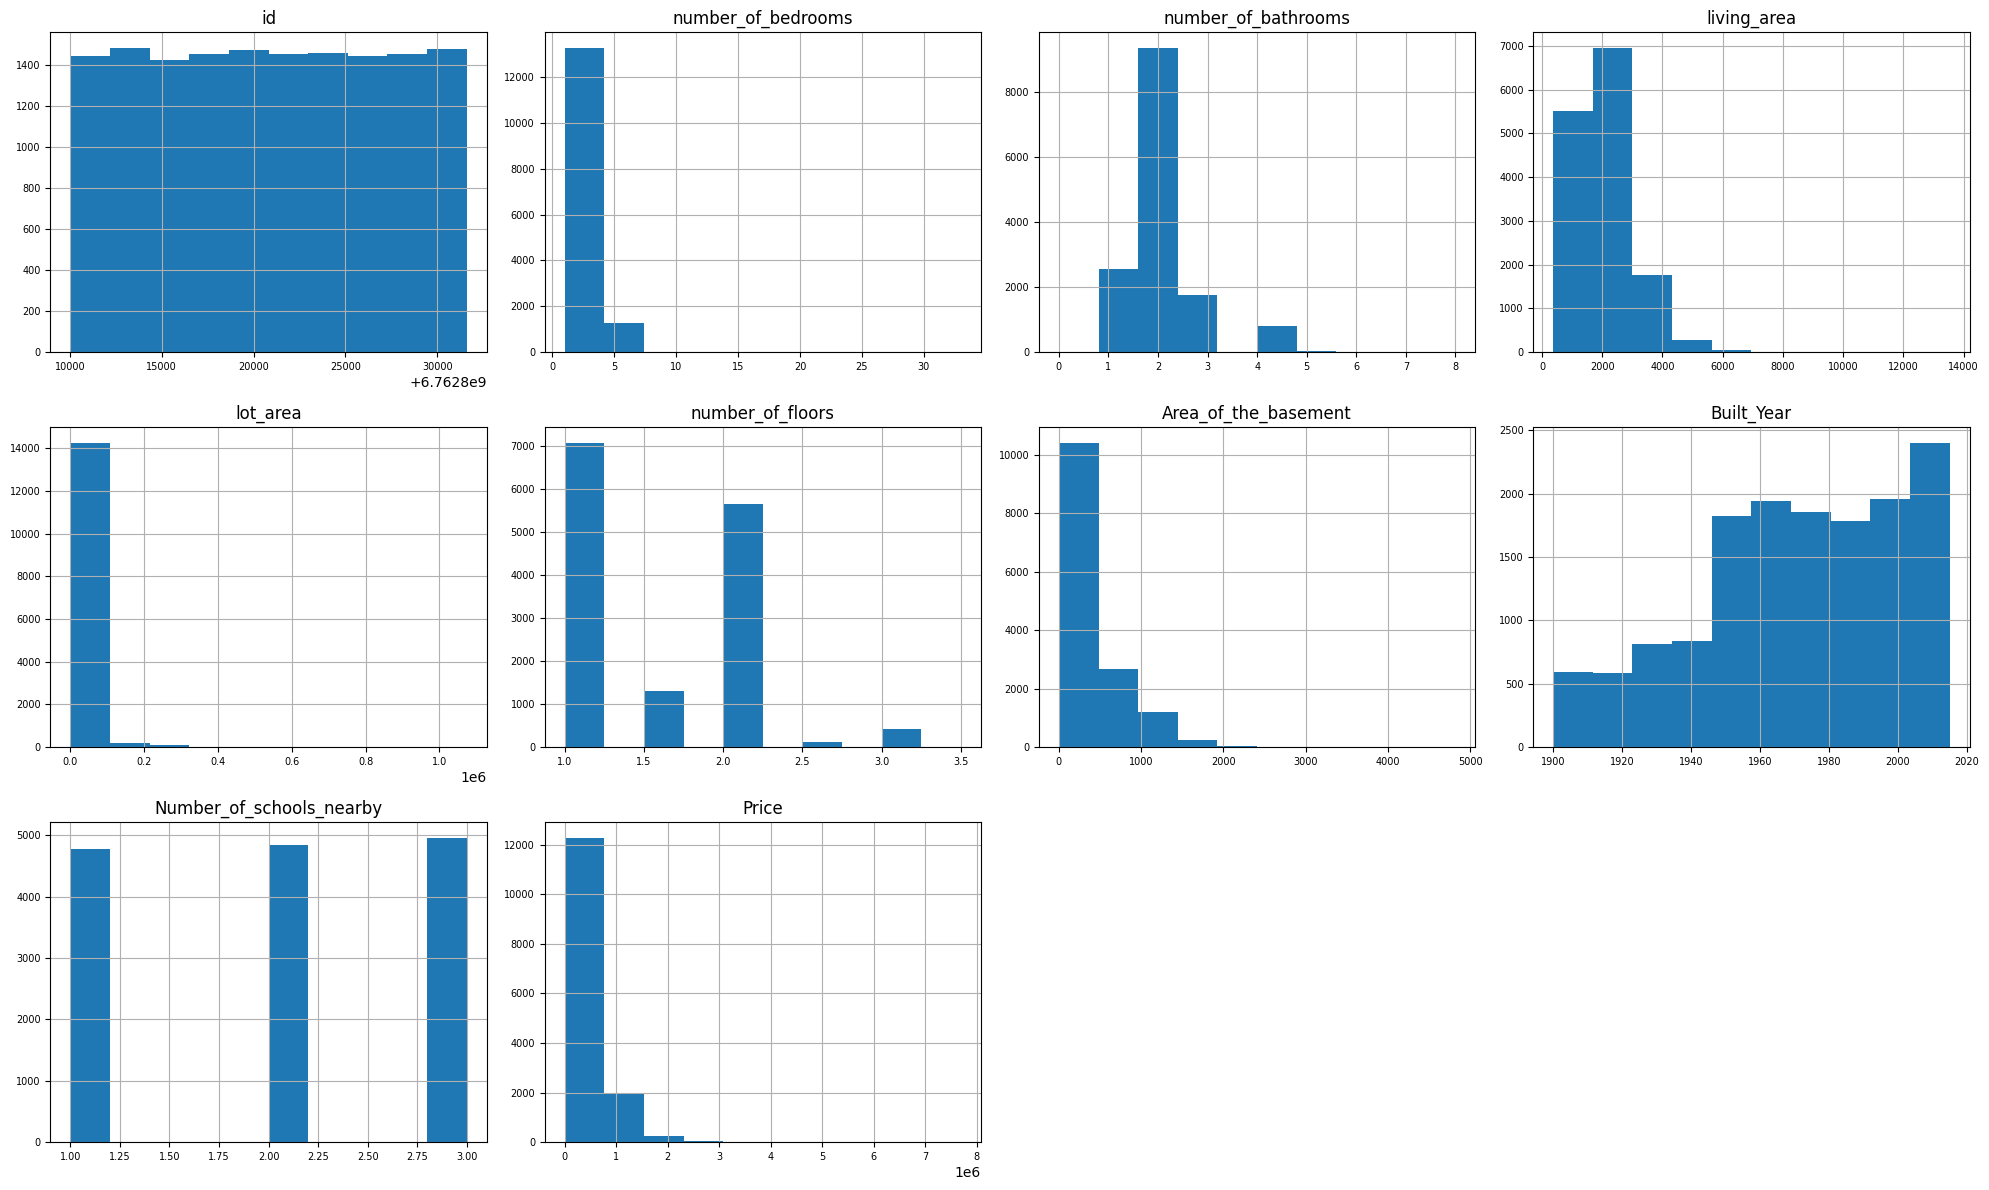

In [107]:
dt.hist(xlabelsize=7,ylabelsize=7,figsize=(20,12),layout=(3,4))
plt.tight_layout()
plt.show()

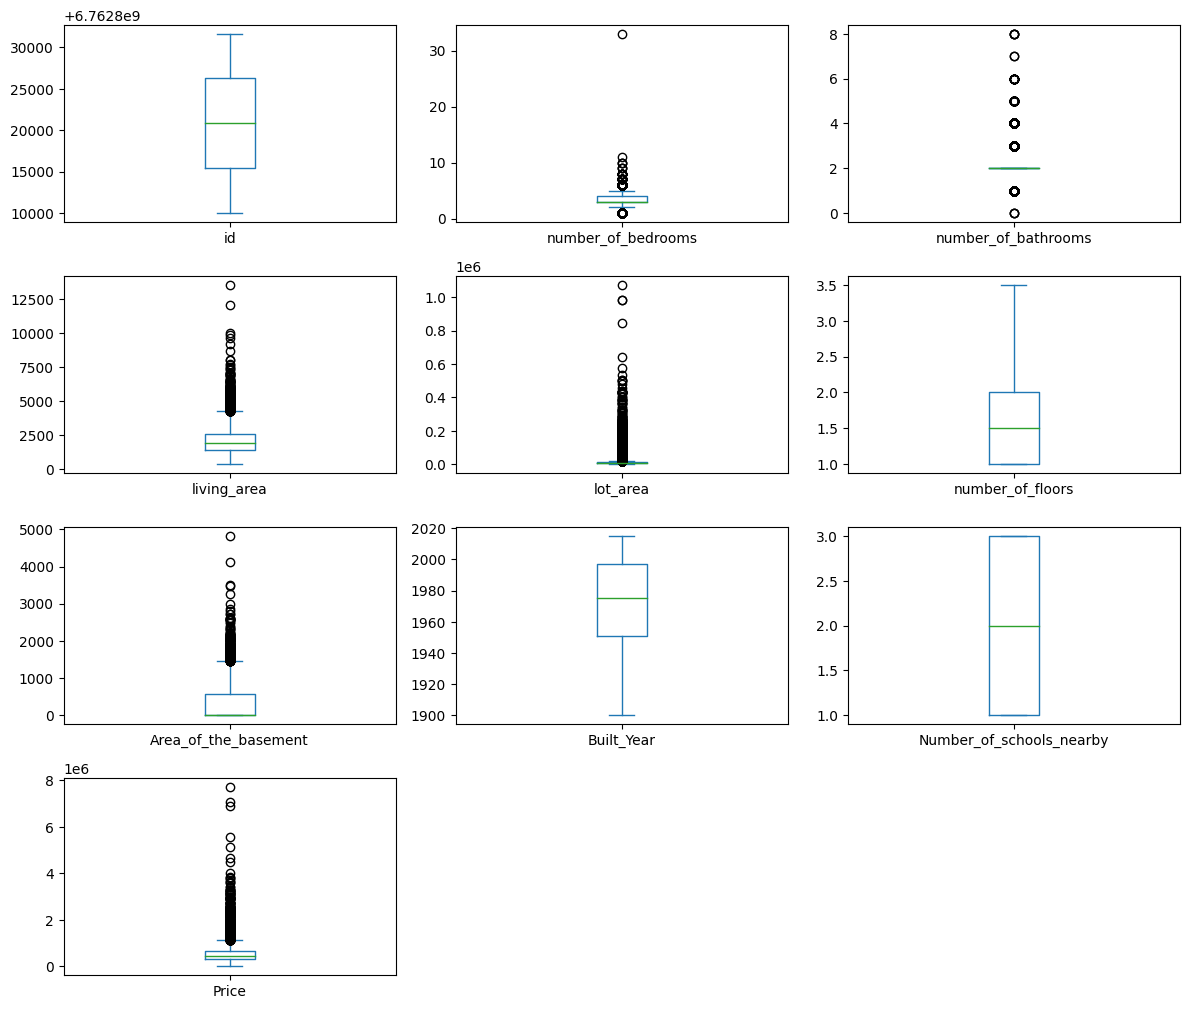

In [108]:
#Boxplot
dt.plot(kind='box',subplots=True,layout=(8,3),figsize=(12,20),sharex=False)
plt.tight_layout()
plt.show()

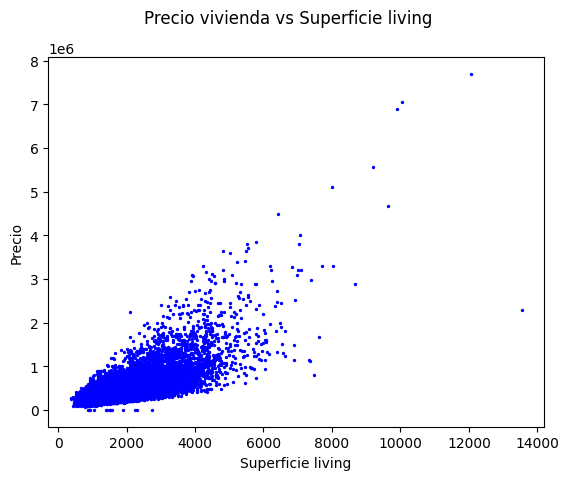

In [113]:
plt.scatter(dt.living_area,dt.Price,color='blue',s=2)
plt.ylabel('Precio')
plt.xlabel('Superficie living')
plt.suptitle('Precio vivienda vs Superficie living')
plt.show()

In [114]:
print(dt.columns)

Index(['id', 'number_of_bedrooms', 'number_of_bathrooms', 'living_area',
       'lot_area', 'number_of_floors', 'Area_of_the_basement', 'Built_Year',
       'Number_of_schools_nearby', 'Price'],
      dtype='object')


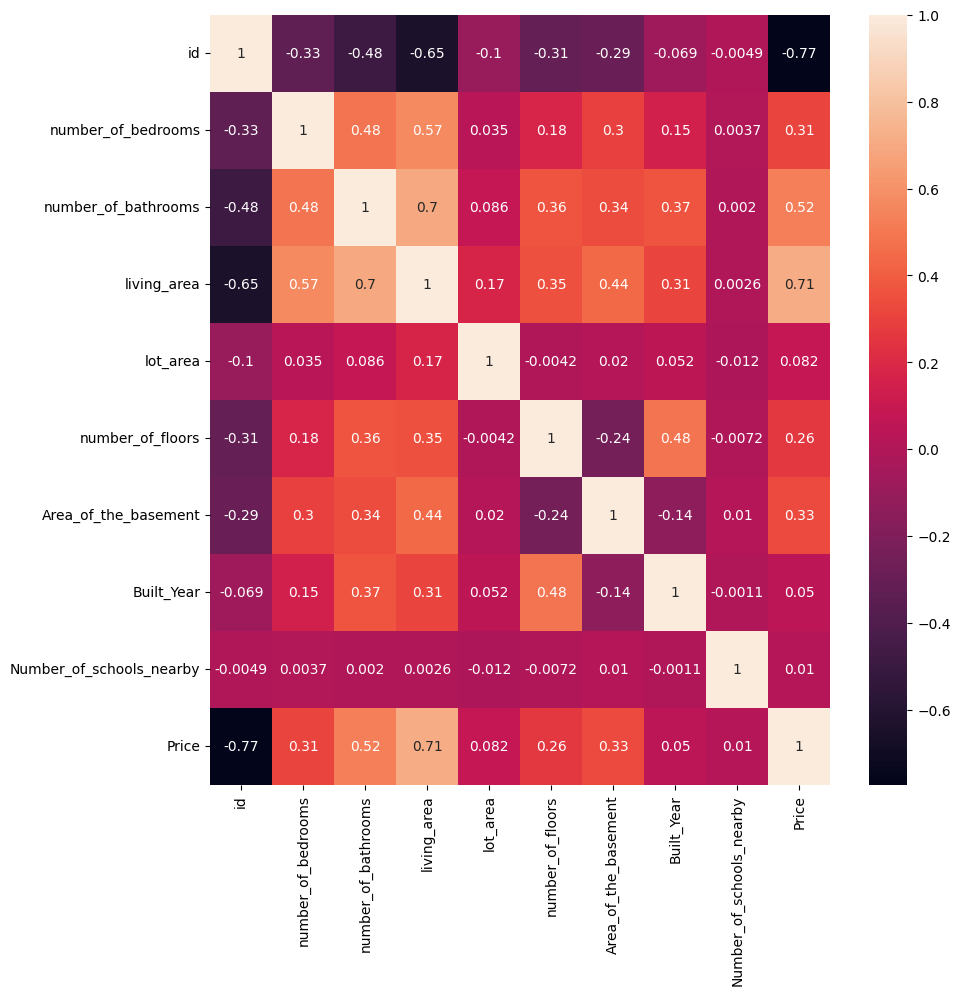

In [118]:
dtcor=dt[['id', 'number_of_bedrooms', 'number_of_bathrooms', 'living_area',
       'lot_area', 'number_of_floors', 'Area_of_the_basement', 'Built_Year',
       'Number_of_schools_nearby', 'Price']].corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(dtcor,annot=True)
plt.show()

In [121]:
rls=smf.ols(formula="Price~living_area",data=dt).fit()
rls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:19:21   Log-Likelihood:            -2.0243e+05
No. Observations:               14581   AIC:                         4.049e+05
Df Residuals:                   14579   BIC:                         4.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.358e+04   5309.037    -10.092      0.000    -6.4e+04   -4.32e+04
living_area   282.3898      2.316    121.948      0.000     277.851     286.929
==============================================================================
Omnibus:                    10581.923   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           491778.512
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      30.816   Cond. No.                     5.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
pred=rls.predict(dt["living_area"])

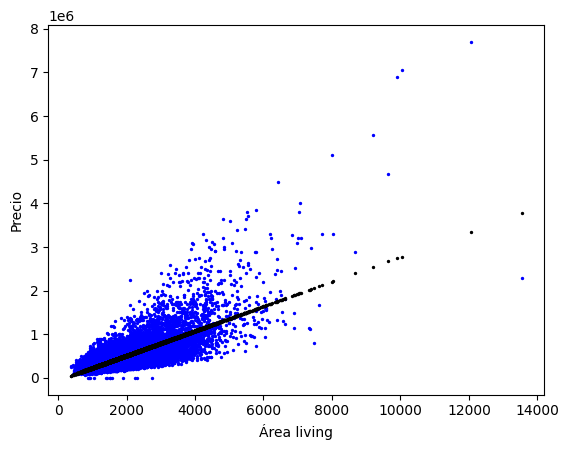

In [123]:
plt.scatter(dt.living_area,dt.Price,color='blue',s=2)
plt.scatter(dt.living_area,pred,color='black',s=2)
plt.xlabel('Área living')
plt.ylabel('Precio')
plt.show()